In [173]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [174]:
df=pd.read_csv('https://raw.githubusercontent.com/Benlau93/Machine-Learning-by-Andrew-Ng-in-Python/master/LogisticRegression/ex2data1.txt', header=None)

In [175]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Get the number of training samples(m) and number of features(n)
m, n = X.shape[0], X.shape[1]
initialTheta = np.zeros((n+1, 1))
# Add column of ones to X
X = np.append(np.ones((m, 1)),X,axis=1)
y = y.reshape(m, 1)

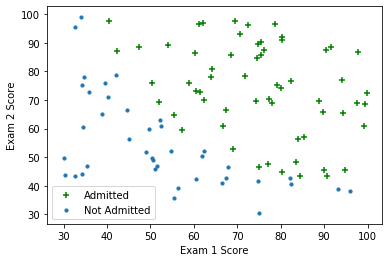

In [176]:
pos, neg = (y == 1).reshape(100, 1), (y == 0).reshape(100, 1)
plt.scatter(X[pos[:,0], 1], X[pos[:,0], 2],c='g',marker='+')
plt.scatter(X[neg[:,0], 1], X[neg[:,0], 2],marker='o',s=10)
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(['Admitted', 'Not Admitted'])
plt.show()

In [177]:
def featureNormalization(X): 
    # Returns the normalized matrix of X
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_norm = (X-mean)/std
    return X_norm

# Feature normalize X
X, X_mean, X_std = featureNormalization(X)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


ValueError: too many values to unpack (expected 3)

In [ ]:
def sigmoid(z): 
    # Returhs the sigmoid of the input element-wise
    return 1/(1 + np.exp(-z))

In [ ]:
def costFunction(theta, X, y): 
    # Add epsilon to predictions to handle case when predictions is 0 to prevent log error
    epsilon = 1e-5
    # Get the number of training exmaples 
    m = len(y)
    # Get the predictions with the current value of theta
    predictions = sigmoid(np.dot(X, theta))
    # Get the error in the predictions (dz)
    error = -(y * np.log(predictions+epsilon) + (1-y) * np.log(1-predictions+epsilon))
    # Calculate the total cost
    cost = 1/m * sum(error)
    # Calculate gradient
    grad = 1/m * (np.dot(X.transpose(), (predictions-y)))
    return cost[0], grad

In [ ]:
initialCost, initialGrad = costFunction(initialTheta, X, y)
print('Initial Cost is:',initialCost)
print('Initial Gradient is:', initialGrad)

In [ ]:
def gradientDescent(theta, X, y, num_iters, alpha): 
    # Get the number of training samples
    m = len(y)
    J_history = []
    for _ in range(num_iters): 
        cost, grad = costFunction(theta, X, y)
        theta = theta - (alpha*grad)
        J_history.append(cost)
    return theta, J_history

In [ ]:
theta, J_history = gradientDescent(initialTheta, X, y, 1000, 1)
print('The final cost is:', J_history[-1])
print('Optimal Weights are:',theta)

In [ ]:
# Plot the cost function
plt.plot(J_history)
plt.title('Trend of Cost Function')
plt.xlabel('Number of iterations')
plt.ylabel('$J (\Theta)$')
plt.show()

In [ ]:
# Plot the decision boundary
plt.scatter(X[pos[:,0], 1], X[pos[:,0], 2],c='g',marker='+')
plt.scatter(X[neg[:,0], 1], X[neg[:,0], 2],marker='o',s=10)
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend(['Admitted', 'Not Admitted'])
x_values = np.array([np.min(X[:,1]), np.max(X[:,1])])
y_values = -(theta[0] + theta[1]*x_values)/theta[2]
plt.plot(x_values, y_values, 'r')
plt.title('Decision Boundary')
plt.show()

In [ ]:
# Test the accuracy of the model
predictions = sigmoid(np.dot(X, theta))
correct = 0
for index, prediction in enumerate(predictions):
    res = 0 if prediction < 0.5 else 1
    if res == y[index]: 
        correct+=1
print('Accuracy of the model is:', correct/len(predictions))
    